# Testing the user defined function

In [1]:
import sys
sys.path.append('/Users/sansan01/Learning/Bayesian_Learning/Exp-16/AutoTuner/')

In [2]:
from tuner import Tuner

In [3]:
from scipy.stats import uniform


param_dict = {"a": uniform(0, 1),
              "b": uniform(0, 5),
              "c": range(1,50)}


# userObjective

In [15]:
def objectiveFunction(args_list):
    #print('User Objective Called')
    results = []
    for hyper_par in args_list:
        a = hyper_par['a']
        b = hyper_par['b']
        c = hyper_par['c']
        result = a + b - c
        results.append(result)
    return results

In [44]:
conf_Dict = dict()

conf_Dict['param_dict']=param_dict
conf_Dict['num_iteration'] = 40
conf_Dict['scheduler'] = 'userObjective'
conf_Dict['userObjective'] = objectiveFunction
conf_Dict['domain_size'] = 3000
conf_Dict['batch_size'] = 1

# Defining Tuner

In [45]:
tuner_user = Tuner(conf_Dict)

In [46]:
tuner_user.getConf()

{'scheduler': 'userObjective',
 'domain_size': 3000,
 'initial_random': 1,
 'num_iteration': 40,
 'objective': 'maximize',
 'batch_size': 1,
 'param_dict': {'a': <scipy.stats._distn_infrastructure.rv_frozen at 0x11714c518>,
  'b': <scipy.stats._distn_infrastructure.rv_frozen at 0x11714c9e8>,
  'c': range(1, 50)},
 'userObjective': <function __main__.objectiveFunction(args_list)>}

In [47]:
results = tuner_user.run()

# Inspect the results

In [48]:
print('best hyper parameters:',results['best_hyper_parameter'])
print('best objective:',results['best_objective'])

best hyper parameters: {'a': 0.9984576267138366, 'b': 4.981612223822195, 'c': 1}
best objective: 4.980069850536031


In [49]:
print('Sample hyper parameters tried:',len(results['hyper_parameters_tried']))
print(results['hyper_parameters_tried'][:2])

Sample hyper parameters tried: 41
[{'a': 0.34962879520605716, 'b': 2.8343232035366093, 'c': 4}, {'a': 0.2794624355913935, 'b': 4.440149367368164, 'c': 17}]


In [41]:
print('Sample objective values',len(results['objective_values']))
print(results['objective_values'][:5])

Sample objective values 201
[-1.9281691846111055, -30.741891698777433, -1.4962850493474655, -3.9391917190562036, -23.44366958961481]


# Plotting the variation in objective values of the tried results

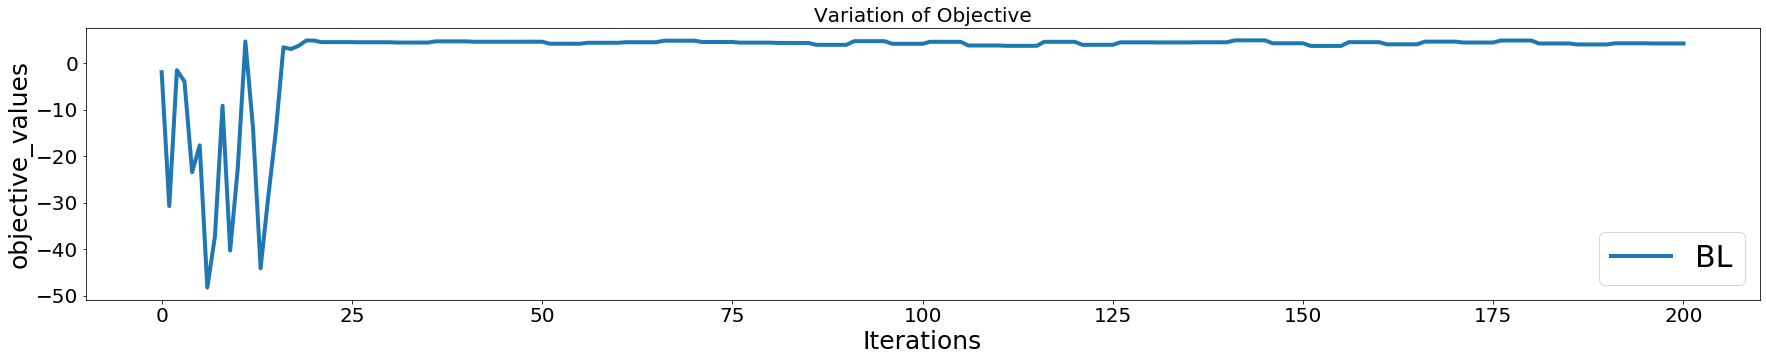

In [43]:
Size = 201 

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()